<h1>Kubeflow Pipeline Arithmetic Operations example</h1>
<h2>This example shows how to build a Kubeflow Pipeline using python functions. It allows the user to provide the arugments for the Pipeline, experiment name and the run name</h2>

<font style="color:red">Ensure Google Cloud SDK is installed on your system and configured correctly:</font>
<a href="https://cloud.google.com/sdk/docs/install">Installing Google Cloud SDK</a>

<font style="color:red">Ensure Notebook API is enabled on Google Cloud platform.</font>
<ol>
  <li>Go to GCP Dashboard</li>
  <li>At the 'Getting Started' page click on 'Explore and enable APIs</li>
  <li>Click on Enable APIS and Services</li>
  <li>Type in 'Notebook' in the search bar, press enter and clikc on Notebooks API</li>
   <li>Click on Enable</li>
</ol>

<font style="color:red">Ensure KFP SDK is installed: </font>
<a href="https://www.kubeflow.org/docs/pipelines/sdk/install-sdk/">Installing KFP SDK</a>
<br>
<font style="color:red">Run 'kfp diagnose_me' if issues persist </font>

<h2>Imports</h2>

In [1]:
import kfp
import kfp.components as comp
from kfp import compiler
import kfp.dsl as dsl

<h2>Connect to the Kubeflow Pipeline and return a client to the Pipeline</h2>
<font style="color:red">Use your Kubeflow Pipeline Hostname. To get the hostname go to your Kubeflow Pipeline and click on settings. Host name will be in the 2nd filed after host=</font>

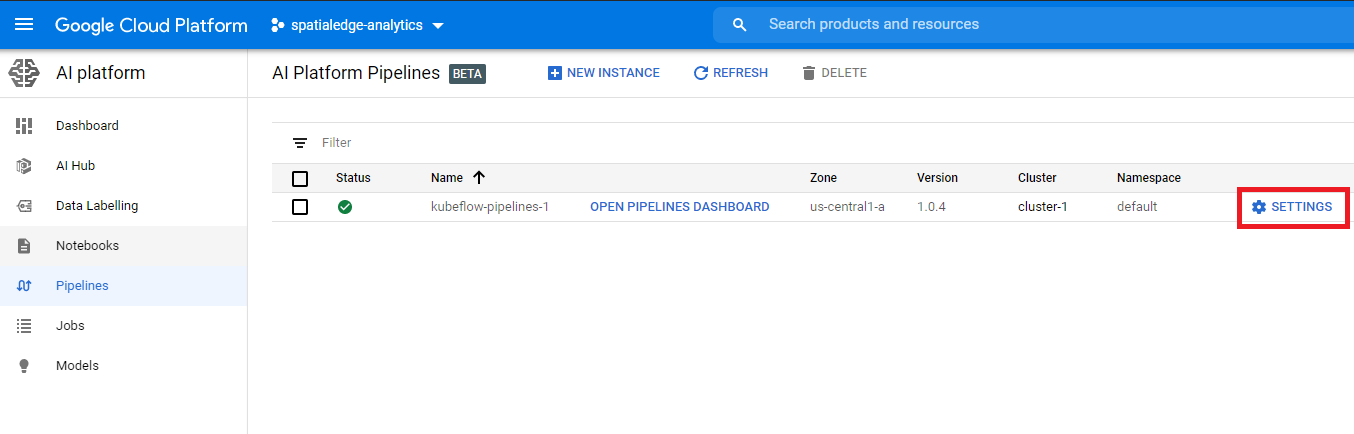

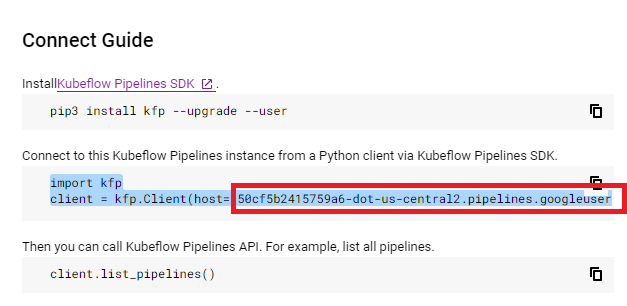

In [2]:
hostName = '1464ba463a69a479-dot-us-central2.pipelines.googleusercontent.com'

In [3]:
client = kfp.Client(host=hostName)

<h2>Build pipeline Components using python functions</h2>


<h3>Build pipeline Components using python functions</h3>

In [4]:
# Define your components code as standalone python functions:
def add(a: float, b: float) -> float:
    '''Calculates sum of two arguments'''
    return a + b

def multiply(c:float, d:float) ->float:
    '''Calculates the product'''
    return c*d

<h3>Convert functions to Pipline components</h3>

In [5]:
# convert the python functions to a component and return a task factory (function whihc returns task object)
add_op = comp.create_component_from_func(add, output_component_file='add_component.yaml')
# you may include to output_component_file argument to export Pipeline components for re-use

product_op = comp.create_component_from_func(multiply, output_component_file='product_component.yaml')

<h2>Build the pipeline using the componets</h2>

In [7]:
@dsl.pipeline(
    name='Addition-pipeline',
    description='An example pipeline that performs addition calculations.'
    )
def operational_pl(a, b='7', c='4', d='1'):
    #Create tasks using the components/task factories
    first_add_task = add_op(a, 4)
    second_add_task = add_op(first_add_task.output, b)
    third_task = product_op(second_add_task.output, c)
    fourth_task = product_op(third_task.output, second_add_task.output)

<h2>Run the pipeline</h2>

<h3>Provide details for the pipeline</h3>

In [8]:
exp_name = input("Provide Experiment Name: ")
runName = input("Provide the run name: ")

Provide Experiment Name: myExp
Provide the run name: run1


<font style="color:green">Provide arguments for the pipeline. Replace values with float values</font>

In [9]:
val1 = input("Value 1: ")
val2 = input("Value 2: ")
val3 = input("Value 3: ")
val4 = input("Value 4: ")

Value 1: 4
Value 2: 2
Value 3: 6
Value 4: 8


In [10]:
arguments = {'a': val1, 'b': val2, 'c':val3, 'd':val4}  # arguments need to be in a dict

In [11]:
# this function runs a pipeline on KFP-enabled using client you created. returns run id
client.create_run_from_pipeline_func(operational_pl, arguments=arguments, run_name=runName,experiment_name=exp_name)

RunPipelineResult(run_id=a78feba8-d364-4ba0-b4bb-d0a9dce06697)

<font style="color:green">When you click on 'Run details' then it will take you to the Kubeflow Pipeline UI where you can view the run</font>

<h2>Export pipeline to .yaml file</h2>

In [12]:
pl_path = input("Please provide the path + filename for the pipeline package,\n"
                 "e.g. /home/user/PycharmProjects/SE-MLpipelines/iris_pl_package.yaml:\n")

Please provide the path + filename for the pipeline package,
e.g. /home/user/PycharmProjects/SE-MLpipelines/iris_pl_package.yaml:
myPipeline.yaml


In [13]:
compiler.Compiler().compile(operational_pl, pl_path)  # compile pipeline into package

<h2>Upload the packaged Pipeline to Kubeflow Pipelines on GCP</h2>
<font style="color:green">Note: You have to use the .yaml file in the previous step</font>

In [14]:
pl_name = input("\nProvide the name of the Pipeline which will be saved on AI platform pipeline: ")
pl_description = input("Provide Pipeline description: ")


Provide the name of the Pipeline which will be saved on AI platform pipeline: Operational-Pipeline
Provide Pipeline description: Implements Arithmetic Operations via PL


<font style="color:green">Note: If a pipeline already with the same name already exists the next code will give an error.</font>

In [15]:
client.upload_pipeline(pipeline_package_path=pl_path,
                               pipeline_name=pl_name, description=pl_description)

{'created_at': datetime.datetime(2020, 12, 11, 11, 35, 1, tzinfo=tzutc()),
 'default_version': {'code_source_url': None,
                     'created_at': datetime.datetime(2020, 12, 11, 11, 35, 1, tzinfo=tzutc()),
                     'id': 'e30b7ad7-e5f0-48ca-922e-14484259382b',
                     'name': 'Operational-Pipeline',
                     'package_url': None,
                     'parameters': [{'name': 'a', 'value': None},
                                    {'name': 'b', 'value': '7'},
                                    {'name': 'c', 'value': '4'},
                                    {'name': 'd', 'value': '1'}],
                     'resource_references': [{'key': {'id': 'e30b7ad7-e5f0-48ca-922e-14484259382b',
                                                      'type': 'PIPELINE'},
                                              'name': None,
                                              'relationship': 'OWNER'}]},
 'description': 'Implements Arithmetic Operations v